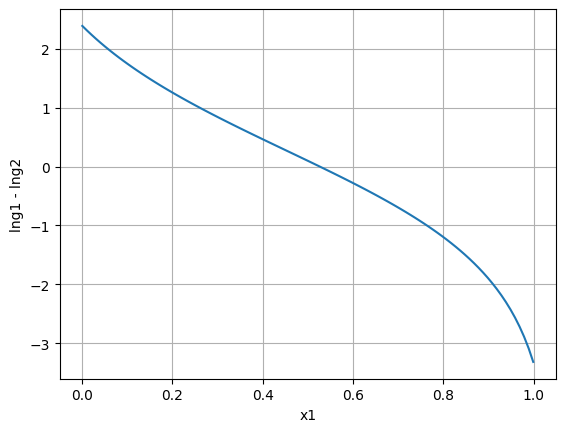

Area above x-axis: 0.5519439415294736
Area below x-axis: -0.551011447678737
Test Result :  0.0008454501966811091 <0.02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

x1 = np.linspace(0.001, 0.999, 100)
T = 363
A12 = 0.6*(np.exp(-1599.711*((1/298)-(1/T))))
A21 = 0.2*(np.exp(-1599.711*((1/298)-(1/T))))

lng1_minus_lng2_values = []

for i in range(0,len(x1)):
  lng1 = -np.log(x1[i]-x1[i]*A12 + A12) + (1-x1[i])*((A12/(x1[i]+ (1-x1[i])*A12))-(A21/((1-x1[i]+x1[i]*A21))))
  lng2 = -np.log(1-x1[i]+x1[i]*A21 ) - x1[i]*((A12/(x1[i]+ (1-x1[i])*A12))-(A21/((1-x1[i]+x1[i]*A21))))
  # print(lng1- lng2)
  lng1_minus_lng2_values.append(lng1 - lng2)
plt.plot(x1, lng1_minus_lng2_values)
plt.xlabel('x1')
plt.ylabel('lng1 - lng2')
plt.grid()
plt.show()

area_above_x_axis = integrate.simps(np.maximum(0, lng1_minus_lng2_values), x1)
area_below_x_axis = integrate.simps(np.minimum(0, lng1_minus_lng2_values), x1)

print(f"Area above x-axis: {area_above_x_axis}")
print(f"Area below x-axis: {area_below_x_axis}")

plt.show()
a1  = area_above_x_axis
a2 = area_below_x_axis
print("Test Result : ",(abs(abs(a1)-(abs(a2)))/(abs(a1)+abs(a2))), "<0.02")

In [ ]:
#activity coefficient for x1 = x2 = 0.5
g1 = np.exp(-np.log(0.5-0.5*A12 + A12) + (1-0.5)*((A12/(0.5+ (1-0.5)*A12))-(A21/((1-0.5+0.5*A21)))))
g2 = np.exp(-np.log(1-0.5+0.5*A21 ) - 0.5*((A12/(0.5+ (1-0.5)*A12))-(A21/((1-0.5+0.5*A21)))))
print(f'lamda1 : {round(g1,4)} and lambda2 : {round(g2,4)}', '\n')

lamda1 : 1.8261 and lambda2 : 1.6551 



In [ ]:
# Excess molar Gibbs free energy calculation at given T when x1 = 0.5 = x2
gE = 8.314*T*((-0.5)*(np.log(0.5+0.5*A12)) - 0.5 * (np.log(0.5+0.5*A21)))
print(f'Molar Excess Free Energy: {round(gE,4)} J/mol')

Molar Excess Free Energy: 1668.9845 J/mol
